In [1]:
from __future__ import print_function
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import keras
from sklearn.decomposition import PCA
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam, Nadam
import time
import os
print(os.listdir("./npy_landuse"))

['x_test.npy', 'x_train.npy', 'y_test.npy', 'y_train.npy']


In [2]:
batch_size = 128
num_classes = 13
epochs = 10

In [3]:
x_train = np.load('npy_landuse/x_train.npy')
y_train = np.load('./npy_landuse/y_train.npy')
x_test=np.load('./npy_landuse/x_test.npy')
y_test=np.load('./npy_landuse/y_test.npy')

In [4]:
x_train.shape

(31200, 64, 64)

In [5]:
x_test.shape

(20800, 64, 64)

In [6]:
y_test.shape

(20800, 13)

In [7]:
# Change from matrix to array --> dimension 64x64 to array of dimention 4096
x_train = x_train.reshape(31200, 4096)
x_test = x_test.reshape(20800, 4096)

In [8]:
y_test.shape

(20800, 13)

In [9]:
# Change to float datatype
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Scale the data to lie between 0 to 1
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

31200 train samples
20800 test samples


In [10]:
# PCA
pca = PCA(n_components=100)

x_train=pca.fit_transform(x_train)
x_test= pca.transform(x_test)

In [11]:
#                      BUILDING THE MODEL
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(100,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
nadam=keras.optimizers.Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy',
              optimizer=nadam,
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               51712     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 13)                6669      
Total params: 321,037
Trainable params: 321,037
Non-trainable params: 0
_________________________________________________________________


In [12]:
start = time.time() # Measuring the processing time
#                      TRAINING THE MODEL
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=100,
                    verbose=1,
                    validation_data=(x_test, y_test))
end = time.time()
print(end - start)


Epoch 1/100
244/244 [==============================] - 2s 9ms/step - loss: 2.4931 - accuracy: 0.1281 - val_loss: 2.4161 - val_accuracy: 0.1490
Epoch 2/100
244/244 [==============================] - 2s 8ms/step - loss: 2.4071 - accuracy: 0.1629 - val_loss: 2.3898 - val_accuracy: 0.1739
Epoch 3/100
244/244 [==============================] - 2s 8ms/step - loss: 2.3782 - accuracy: 0.1779 - val_loss: 2.3699 - val_accuracy: 0.1788
Epoch 4/100
244/244 [==============================] - 2s 8ms/step - loss: 2.3469 - accuracy: 0.1947 - val_loss: 2.3407 - val_accuracy: 0.1935
Epoch 5/100
244/244 [==============================] - 2s 8ms/step - loss: 2.3137 - accuracy: 0.2037 - val_loss: 2.3065 - val_accuracy: 0.2025
Epoch 6/100
244/244 [==============================] - 2s 8ms/step - loss: 2.2799 - accuracy: 0.2189 - val_loss: 2.2748 - val_accuracy: 0.2262
Epoch 7/100
244/244 [==============================] - 2s 8ms/step - loss: 2.2442 - accuracy: 0.2351 - val_loss: 2.2391 - val_accuracy: 0.2377

Epoch 58/100
244/244 [==============================] - 2s 8ms/step - loss: 0.6286 - accuracy: 0.8037 - val_loss: 0.5183 - val_accuracy: 0.8652
Epoch 59/100
244/244 [==============================] - 2s 8ms/step - loss: 0.6149 - accuracy: 0.8063 - val_loss: 0.5044 - val_accuracy: 0.8711
Epoch 60/100
244/244 [==============================] - 2s 8ms/step - loss: 0.6063 - accuracy: 0.8054 - val_loss: 0.4872 - val_accuracy: 0.8773
Epoch 61/100
244/244 [==============================] - 2s 8ms/step - loss: 0.5905 - accuracy: 0.8132 - val_loss: 0.4722 - val_accuracy: 0.8810
Epoch 62/100
244/244 [==============================] - 2s 8ms/step - loss: 0.5699 - accuracy: 0.8206 - val_loss: 0.4639 - val_accuracy: 0.8831
Epoch 63/100
244/244 [==============================] - 2s 8ms/step - loss: 0.5627 - accuracy: 0.8253 - val_loss: 0.4616 - val_accuracy: 0.8754
Epoch 64/100
244/244 [==============================] - 2s 8ms/step - loss: 0.5428 - accuracy: 0.8290 - val_loss: 0.4306 - val_accuracy:

In [13]:
#                      EVALUATE TRAINED MODEL
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.13506853580474854
Test accuracy: 0.9761057496070862


In [14]:
model.save('mlp_weights_1.h5')

In [15]:
model.load_weights('mlp_weights_1.h5')

In [16]:
model_feat = Model(inputs=model.input,outputs=model.get_layer('dense_2').output)

feat_train = model_feat.predict(x_train)
print(feat_train.shape)

#feat_val = model_feat.predict(x_val)
#print(feat_val.shape)

feat_test = model_feat.predict(x_test)
print(feat_test.shape)

(31200, 13)
(20800, 13)


In [17]:
from keras import metrics
from sklearn.metrics import confusion_matrix

In [18]:
pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [19]:
confusion_matrix(pred, np.argmax(y_test,axis =1))

array([[1537,    0,    0,    7,    6,    0,    0,    0,    0,    0,   17,
           0,    0],
       [   0, 1569,    0,    0,    0,    0,    0,    0,    0,    7,    0,
           7,    0],
       [   0,    0, 1610,    0,    3,    0,    0,    0,    0,    0,    0,
           0,    0],
       [   9,    0,    6, 1533,    5,   12,   19,    0,    9,   24,    0,
           0,   10],
       [   0,    0,    0,    0, 1571,   21,    0,    0,    0,   13,    4,
           0,    5],
       [   7,    0,    0,    0,   11, 1455,    5,    0,    0,    8,   13,
           0,    3],
       [   0,    0,    0,    0,    6,    4, 1522,    0,    0,    0,    0,
           0,    0],
       [   0,    4,    0,    0,    0,    8,   14, 1586,    0,    0,    0,
           6,    0],
       [   0,    0,    5,   54,    4,   15,   10,    8, 1654,    4,    4,
           0,    6],
       [   0,    0,    0,    0,    6,   14,    0,    0,    0, 1568,   34,
           0,    0],
       [   0,    0,    0,    0,    0,    7,    0, 

In [20]:
import seaborn as sns

In [21]:
def plot_heatmap(cm,title):
    df_cm2 = pd.DataFrame(cm, index = ['agriculture','buildings','denseresidential', 'forest', 'freeway', 'golfcourse',
                                       'intersection','mediumresidential','parkinglot','river','runway','sparseresidential',
                                       'tenniscourt'])
    df_cm2.columns=['agriculture','buildings','denseresidential', 'forest', 'freeway', 'golfcourse',
                                       'intersection','mediumresidential','parkinglot','river','runway','sparseresidential',
                                       'tenniscourt']
    f,ax = plt.subplots(figsize=(12, 12))
    #ax = plt.axes()
    sns.heatmap(df_cm2, annot=True, fmt="d", linewidths=.5,ax=ax)
    ax.set_title(title)
    plt.show()

    
    return

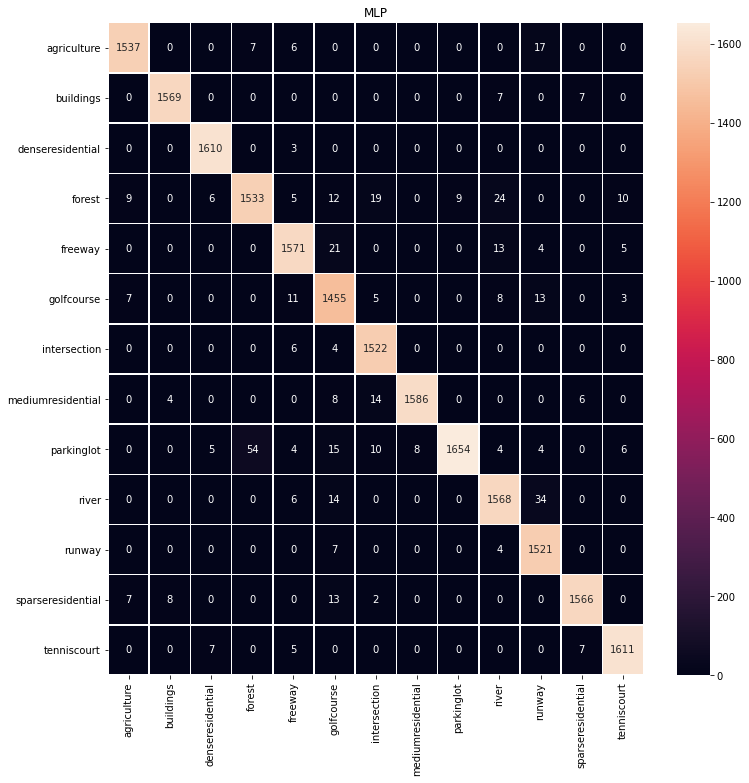

In [22]:
plot_heatmap(confusion_matrix(pred, np.argmax(y_test,axis =1)),'MLP')

In [23]:
from sklearn.metrics import classification_report
print(classification_report(pred, np.argmax(y_test,axis =1),digits=4))

              precision    recall  f1-score   support

           0     0.9853    0.9809    0.9831      1567
           1     0.9924    0.9912    0.9918      1583
           2     0.9889    0.9981    0.9935      1613
           3     0.9617    0.9422    0.9519      1627
           4     0.9716    0.9734    0.9725      1614
           5     0.9393    0.9687    0.9538      1502
           6     0.9682    0.9935    0.9807      1532
           7     0.9950    0.9802    0.9875      1618
           8     0.9946    0.9376    0.9653      1764
           9     0.9631    0.9667    0.9649      1622
          10     0.9548    0.9928    0.9734      1532
          11     0.9874    0.9812    0.9843      1596
          12     0.9853    0.9883    0.9868      1630

    accuracy                         0.9761     20800
   macro avg     0.9760    0.9765    0.9761     20800
weighted avg     0.9764    0.9761    0.9761     20800



In [24]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
start = time.time() # Measuring the processing time
svm.fit(feat_train,np.argmax(y_train,axis=1))
end = time.time()
print(end - start)


print('fitting done !!!')

0.6044058799743652
fitting done !!!


In [25]:
svm.score(feat_train,np.argmax(y_train,axis=1))

0.9926602564102565

In [26]:
svm.score(feat_test,np.argmax(y_test,axis=1))

0.9794711538461538

In [27]:
Pred_labels = svm.predict(feat_test)

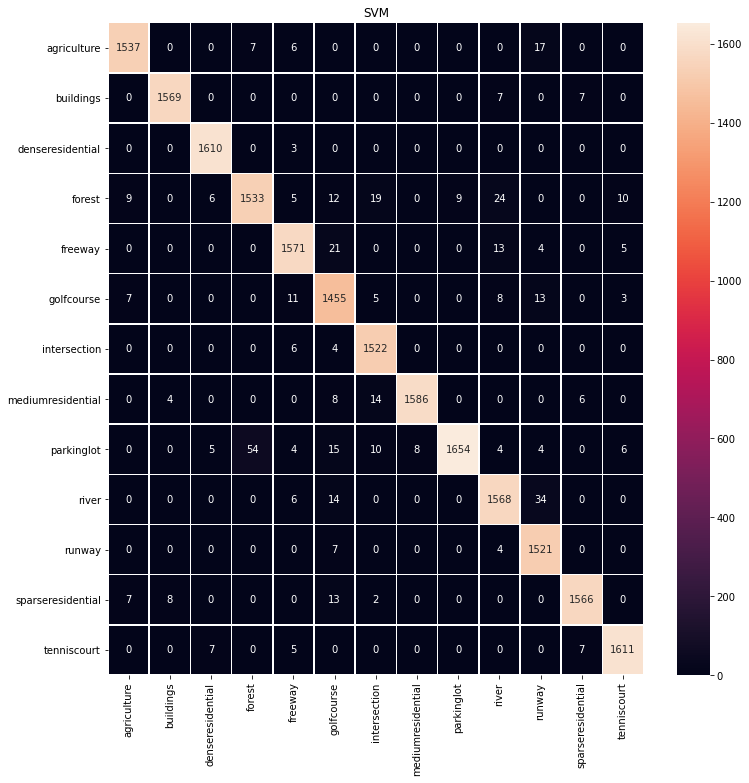

In [28]:
plot_heatmap(confusion_matrix(pred, np.argmax(y_test,axis =1)),'SVM')

In [29]:
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

              precision    recall  f1-score   support

           0     0.9853    0.9821    0.9837      1565
           1     0.9949    0.9912    0.9931      1587
           2     0.9877    1.0000    0.9938      1608
           3     0.9661    0.9542    0.9601      1614
           4     0.9722    0.9782    0.9752      1607
           5     0.9626    0.9539    0.9582      1563
           6     0.9803    0.9885    0.9844      1559
           7     1.0000    0.9870    0.9935      1615
           8     0.9814    0.9726    0.9770      1678
           9     0.9607    0.9714    0.9660      1610
          10     0.9686    0.9822    0.9753      1571
          11     0.9880    0.9899    0.9890      1583
          12     0.9853    0.9823    0.9838      1640

    accuracy                         0.9795     20800
   macro avg     0.9795    0.9795    0.9795     20800
weighted avg     0.9795    0.9795    0.9795     20800



# Applying XGBOOST

In [30]:
import xgboost as xgb

xb = xgb.XGBClassifier()
start = time.time() # Measuring the processing time
xb.fit(feat_train,np.argmax(y_train,axis=1))
end = time.time()
print(end - start)

print('fitting done !!!')

8.628930807113647
fitting done !!!


In [31]:
xb.score(feat_train,np.argmax(y_train,axis=1))

1.0

In [32]:
xb.score(feat_test,np.argmax(y_test,axis=1))

0.9957211538461539

In [33]:
Pred_labels = xb.predict(feat_test)

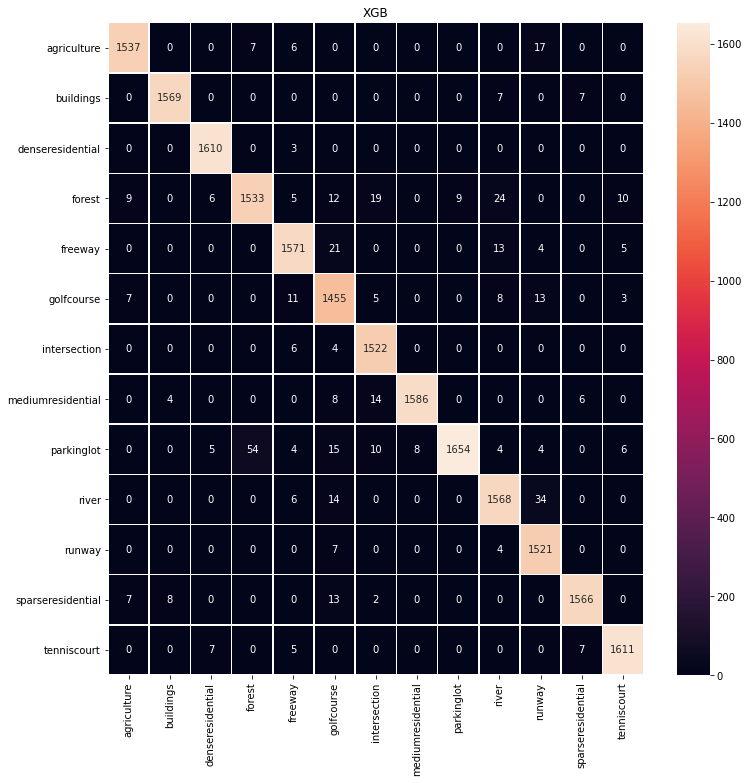

In [34]:
plot_heatmap(confusion_matrix(pred, np.argmax(y_test,axis =1)),'XGB')

In [35]:
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

              precision    recall  f1-score   support

           0     1.0000    0.9987    0.9994      1562
           1     1.0000    1.0000    1.0000      1581
           2     0.9957    1.0000    0.9978      1621
           3     0.9944    0.9814    0.9878      1615
           4     0.9827    0.9956    0.9891      1596
           5     0.9948    0.9929    0.9939      1552
           6     0.9955    0.9962    0.9959      1571
           7     1.0000    1.0000    1.0000      1594
           8     0.9940    0.9958    0.9949      1660
           9     0.9957    0.9927    0.9942      1633
          10     1.0000    1.0000    1.0000      1593
          11     0.9956    1.0000    0.9978      1579
          12     0.9963    0.9915    0.9939      1643

    accuracy                         0.9957     20800
   macro avg     0.9957    0.9958    0.9957     20800
weighted avg     0.9957    0.9957    0.9957     20800



In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import model_selection

In [37]:
lr = LogisticRegression()
start = time.time() # Measuring the processing time
lr.fit(feat_train,np.argmax(y_train,axis=1))
end = time.time()
print(end - start)

print('fitting done !!!')

1.3453805446624756
fitting done !!!


In [38]:
Pred_labels = lr.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

              precision    recall  f1-score   support

           0     0.9853    0.9846    0.9849      1561
           1     0.9949    0.9912    0.9931      1587
           2     0.9889    1.0000    0.9944      1610
           3     0.9693    0.9519    0.9605      1623
           4     0.9678    0.9781    0.9730      1600
           5     0.9587    0.9495    0.9541      1564
           6     0.9733    0.9884    0.9808      1548
           7     0.9975    0.9876    0.9925      1610
           8     0.9844    0.9652    0.9747      1696
           9     0.9644    0.9691    0.9667      1620
          10     0.9699    0.9885    0.9791      1563
          11     0.9880    0.9899    0.9890      1583
          12     0.9853    0.9853    0.9853      1635

    accuracy                         0.9791     20800
   macro avg     0.9790    0.9792    0.9791     20800
weighted avg     0.9791    0.9791    0.9791     20800



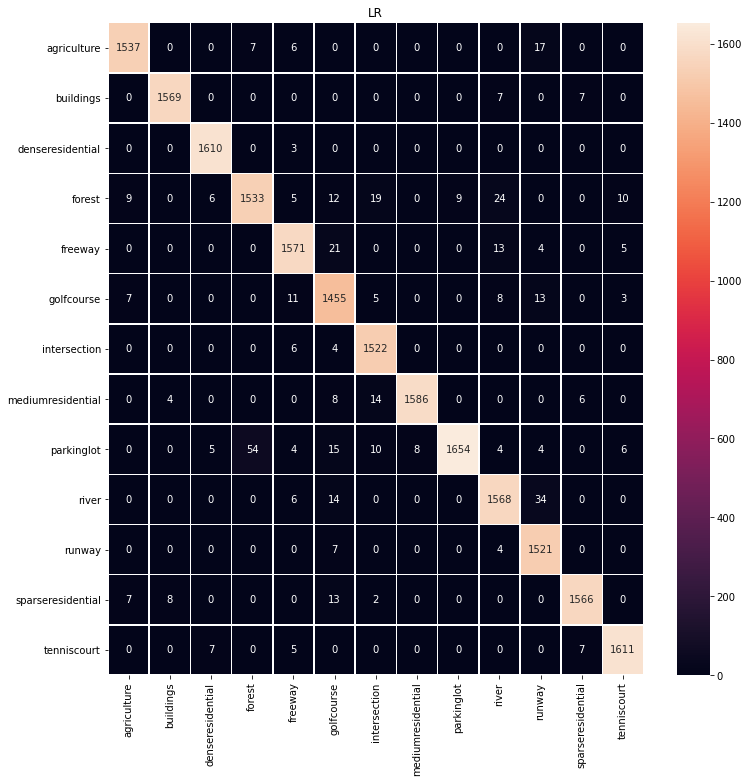

In [39]:
plot_heatmap(confusion_matrix(pred, np.argmax(y_test,axis =1)),'LR')

In [40]:
dt = DecisionTreeClassifier()
start = time.time() # Measuring the processing time
dt.fit(feat_train,np.argmax(y_train,axis=1))
end = time.time()
print(end - start)

print('fitting done !!!')
Pred_labels = dt.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

0.29424214363098145
fitting done !!!
              precision    recall  f1-score   support

           0     0.9955    0.9968    0.9962      1558
           1     0.9949    1.0000    0.9975      1573
           2     1.0000    0.9969    0.9985      1633
           3     0.9755    0.9836    0.9795      1581
           4     0.9957    0.9847    0.9902      1635
           5     0.9787    0.9934    0.9860      1526
           6     1.0000    1.0000    1.0000      1572
           7     1.0000    1.0000    1.0000      1594
           8     0.9868    0.9844    0.9856      1667
           9     0.9920    0.9932    0.9926      1626
          10     1.0000    0.9907    0.9953      1608
          11     0.9956    0.9950    0.9953      1587
          12     0.9963    0.9933    0.9948      1640

    accuracy                         0.9932     20800
   macro avg     0.9932    0.9932    0.9932     20800
weighted avg     0.9932    0.9932    0.9932     20800



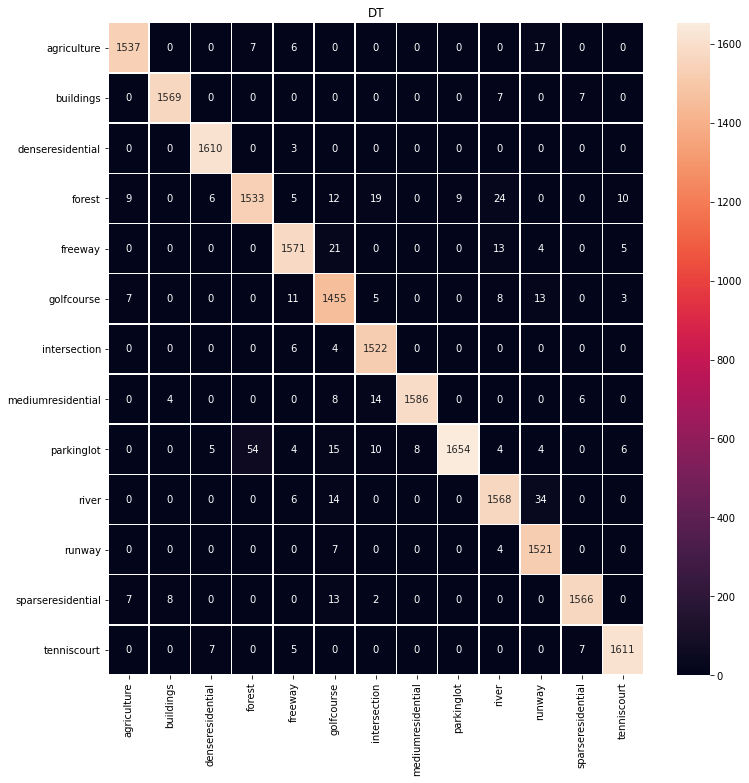

In [41]:
plot_heatmap(confusion_matrix(pred, np.argmax(y_test,axis =1)),'DT')

In [42]:
knn = KNeighborsClassifier()
start = time.time() # Measuring the processing time
knn.fit(feat_train,np.argmax(y_train,axis=1))
end = time.time()
print(end - start)

print('fitting done !!!')
Pred_labels = knn.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

0.1396324634552002
fitting done !!!
              precision    recall  f1-score   support

           0     0.9865    0.9961    0.9913      1545
           1     1.0000    0.9875    0.9937      1601
           2     0.9877    1.0000    0.9938      1608
           3     0.9799    0.9799    0.9799      1594
           4     0.9765    0.9875    0.9820      1599
           5     0.9781    0.9787    0.9784      1548
           6     0.9866    0.9873    0.9870      1571
           7     1.0000    0.9870    0.9935      1615
           8     0.9886    0.9844    0.9865      1670
           9     0.9877    0.9841    0.9859      1634
          10     0.9881    0.9875    0.9878      1594
          11     0.9912    0.9962    0.9937      1578
          12     0.9927    0.9878    0.9902      1643

    accuracy                         0.9880     20800
   macro avg     0.9880    0.9880    0.9880     20800
weighted avg     0.9880    0.9880    0.9880     20800



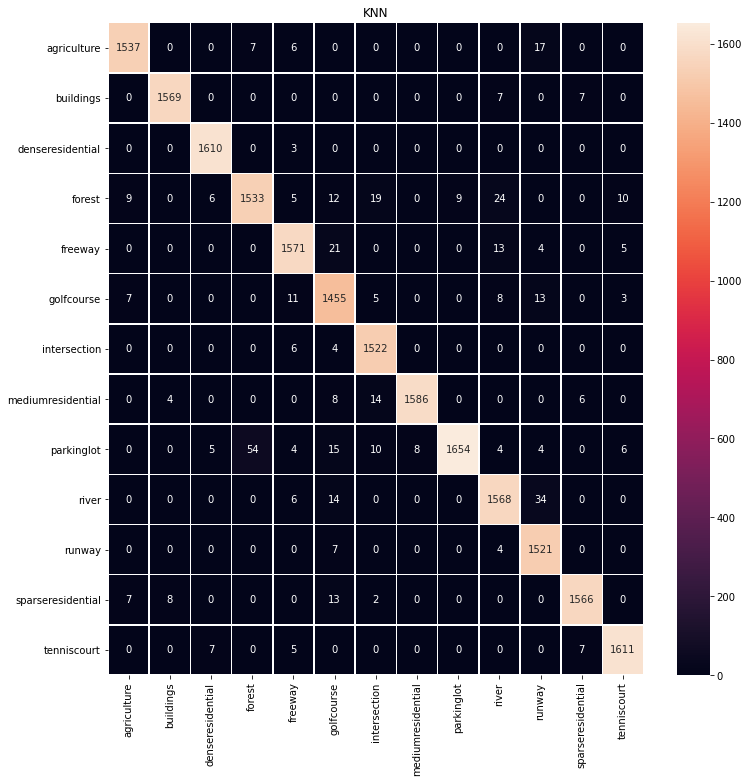

In [43]:
plot_heatmap(confusion_matrix(pred, np.argmax(y_test,axis =1)),'KNN')

In [44]:
lda = LinearDiscriminantAnalysis()
start = time.time() # Measuring the processing time
lda.fit(feat_train,np.argmax(y_train,axis=1))
end = time.time()
print(end - start)

print('fitting done !!!')
Pred_labels = lda.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

0.074798583984375
fitting done !!!
              precision    recall  f1-score   support

           0     0.9814    0.9846    0.9830      1555
           1     0.9905    0.9955    0.9930      1573
           2     0.9889    1.0000    0.9944      1610
           3     0.9686    0.9185    0.9429      1681
           4     0.9678    0.9818    0.9748      1594
           5     0.9761    0.9265    0.9506      1632
           6     0.9644    0.9961    0.9800      1522
           7     0.9906    0.9838    0.9872      1605
           8     0.9880    0.9614    0.9745      1709
           9     0.9607    0.9720    0.9663      1609
          10     0.9523    0.9928    0.9721      1528
          11     0.9805    0.9955    0.9879      1562
          12     0.9823    0.9914    0.9868      1620

    accuracy                         0.9763     20800
   macro avg     0.9763    0.9769    0.9764     20800
weighted avg     0.9764    0.9763    0.9762     20800



In [45]:
nb = GaussianNB()
start = time.time() # Measuring the processing time
nb.fit(feat_train,np.argmax(y_train,axis=1))
end = time.time()
print(end - start)

print('fitting done !!!')
Pred_labels = nb.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

0.01496124267578125
fitting done !!!
              precision    recall  f1-score   support

           0     0.9750    0.9744    0.9747      1561
           1     0.9842    1.0000    0.9920      1556
           2     0.9846    1.0000    0.9923      1603
           3     0.9561    0.9425    0.9492      1617
           4     0.9481    0.9910    0.9690      1547
           5     0.9716    0.8575    0.9110      1755
           6     0.9752    0.9660    0.9706      1587
           7     0.9856    0.9874    0.9865      1591
           8     0.9513    0.9894    0.9700      1599
           9     0.9582    0.9571    0.9576      1630
          10     0.9661    0.9753    0.9707      1578
          11     0.9666    0.9929    0.9796      1544
          12     0.9786    0.9804    0.9795      1632

    accuracy                         0.9692     20800
   macro avg     0.9693    0.9703    0.9694     20800
weighted avg     0.9693    0.9692    0.9689     20800



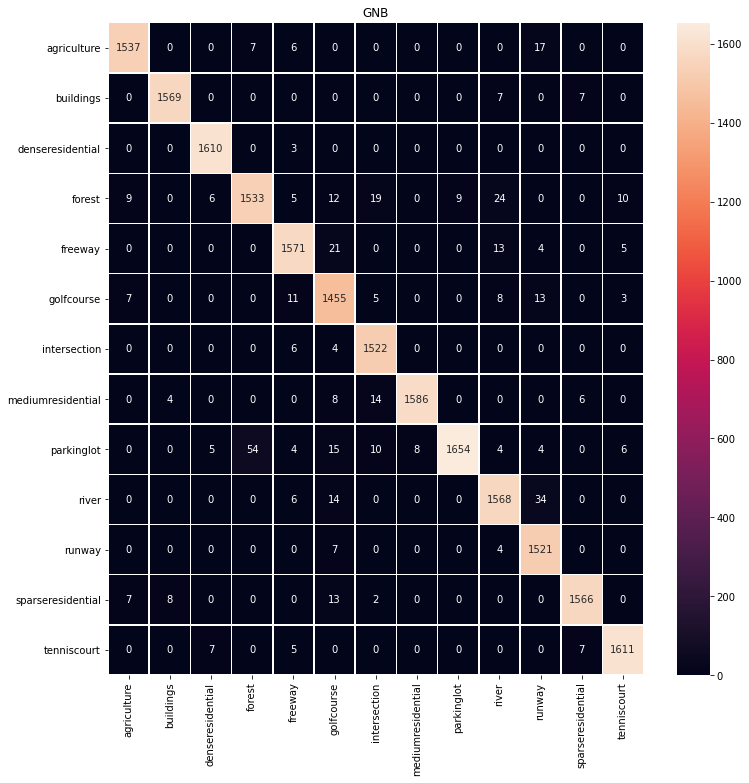

In [46]:
plot_heatmap(confusion_matrix(pred, np.argmax(y_test,axis =1)),'GNB')

In [47]:
et = ExtraTreesClassifier()
start = time.time() # Measuring the processing time
et.fit(feat_train,np.argmax(y_train,axis=1))
end = time.time()
print(end - start)

print('fitting done !!!')
Pred_labels = et.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

1.2855725288391113
fitting done !!!
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000      1560
           1     1.0000    1.0000    1.0000      1581
           2     1.0000    1.0000    1.0000      1628
           3     1.0000    1.0000    1.0000      1594
           4     1.0000    1.0000    1.0000      1617
           5     0.9948    1.0000    0.9974      1541
           6     1.0000    0.9949    0.9975      1580
           7     1.0000    1.0000    1.0000      1594
           8     1.0000    1.0000    1.0000      1663
           9     1.0000    1.0000    1.0000      1628
          10     1.0000    1.0000    1.0000      1593
          11     1.0000    1.0000    1.0000      1586
          12     1.0000    1.0000    1.0000      1635

    accuracy                         0.9996     20800
   macro avg     0.9996    0.9996    0.9996     20800
weighted avg     0.9996    0.9996    0.9996     20800



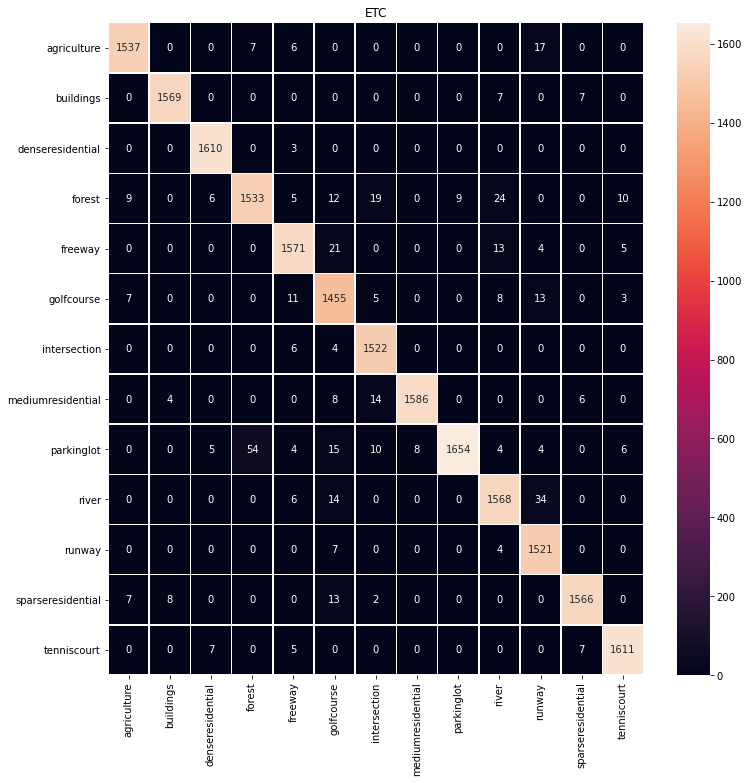

In [48]:
plot_heatmap(confusion_matrix(pred, np.argmax(y_test,axis =1)),'ETC')

In [49]:
estimators = list()
estimators.append(('RF', RandomForestClassifier()))
estimators.append(('LR', LogisticRegression()))
estimators.append(('DTC', DecisionTreeClassifier()))
estimators.append(('KNN', KNeighborsClassifier()))
estimators.append(('LDA', LinearDiscriminantAnalysis()))
estimators.append(('NB', GaussianNB()))
#estimators.append(('SVM', GradientBoostingClassifier(learning_rate=0.01, n_estimators=1500,max_depth=4, min_samples_split=40, min_samples_leaf=7,max_features=4 , subsample=0.95, random_state=10)))
estimators.append(('XGB', XGBClassifier()))

In [50]:
ensemble = VotingClassifier(estimators=estimators, voting='soft')
start = time.time() # Measuring the processing time
ensemble.fit(feat_train,np.argmax(y_train,axis=1))
end = time.time()
print(end - start)

print('fitting done !!!')
Pred_labels = ensemble.predict(feat_test)
print(classification_report(Pred_labels, np.argmax(y_test,axis =1),digits=4))

15.850633144378662
fitting done !!!
              precision    recall  f1-score   support

           0     0.9910    0.9917    0.9913      1559
           1     1.0000    1.0000    1.0000      1581
           2     0.9957    1.0000    0.9978      1621
           3     0.9837    0.9776    0.9806      1604
           4     0.9827    0.9913    0.9870      1603
           5     0.9858    0.9770    0.9814      1563
           6     0.9911    0.9911    0.9911      1572
           7     1.0000    0.9956    0.9978      1601
           8     0.9844    0.9885    0.9864      1656
           9     0.9902    0.9884    0.9893      1631
          10     0.9918    0.9956    0.9937      1587
          11     0.9956    1.0000    0.9978      1579
          12     0.9963    0.9915    0.9939      1643

    accuracy                         0.9914     20800
   macro avg     0.9914    0.9914    0.9914     20800
weighted avg     0.9914    0.9914    0.9914     20800



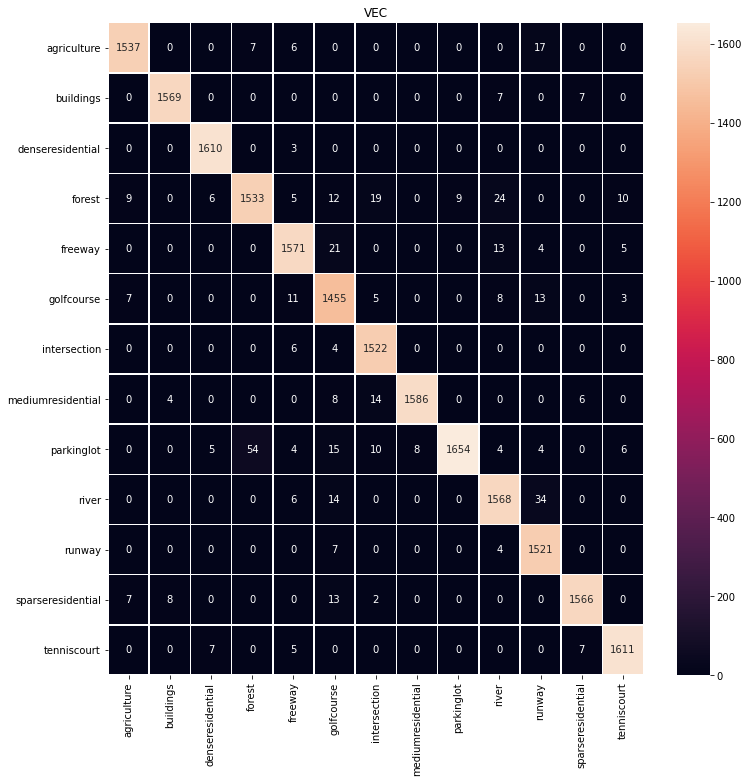

In [51]:
plot_heatmap(confusion_matrix(pred, np.argmax(y_test,axis =1)),'VEC')